In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Simple Linear Regression

**Over 60 years of Oceanographic data:** Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

In [ ]:
data = pd.read_pickle("AgesAndHeights.pkl")
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [ ]:
print(data.shape)
data.describe()

(100, 2)


,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


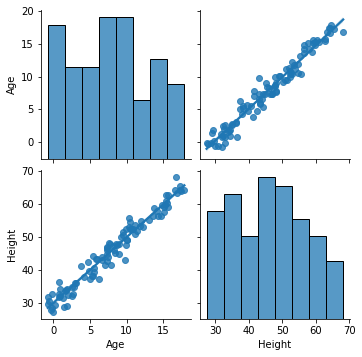

In [ ]:
sns.pairplot(data, kind="reg")

In [ ]:
#Data Cleaning
df = data[data['Age'] > 0]
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


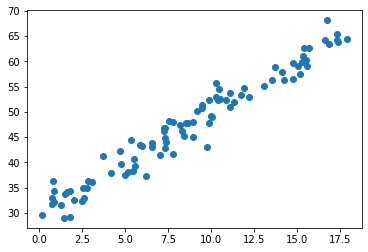

In [ ]:
plt.scatter(df['Age'],df['Height'],label='Raw Data')
plt.show()

In [ ]:
df.isnull().sum()

Age       0
Height    0
dtype: int64

In [ ]:
X = np.array(df['Age']).reshape(-1, 1)
y = np.array(df['Height']).reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)                                     # Predict Linear Model
accuracy_score = model.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 96.9%


In [ ]:
print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.969


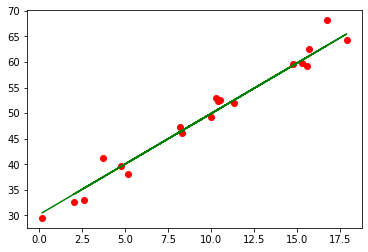

In [ ]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

**Bias:**
Biases are the underlying assumptions that are made by data to simplify the target function. Bias does help us generalize the data better and make the model less sensitive to single data points. It also decreases the training time because of the decrease in complexity of target function High bias suggest that there is more assumption taken on target function. This leads to the underfitting of the model sometimes.
Examples of High bias Algorithms include Linear Regression, Logistic Regression etc.

**Variance:**
In machine learning, Variance is a type of error that occurs due to a model’s sensitivity to small fluctuations in the dataset. The high variance would cause an algorithm to model the outliers/noise in the training set. This is most commonly referred to as overfitting. In this situation, the model basically learns every data point and does not offer good prediction when it tested on a novel dataset.
Examples of High variance Algorithms include Decision Tree, KNN etc.

# Multiple Linear Regression

*   US Housing Data for Price Prediction



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [ ]:
data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
print(data.shape)
print(data.columns)
data.columns = ['Area_Income','AreaHouse_Age','AreaRooms_Numbers','AreaBedrooms_Numbers','Area_Population','Price','Address']
print(data.columns)


(5000, 7)
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
Index(['Area_Income', 'AreaHouse_Age', 'AreaRooms_Numbers',
       'AreaBedrooms_Numbers', 'Area_Population', 'Price', 'Address'],
      dtype='object')


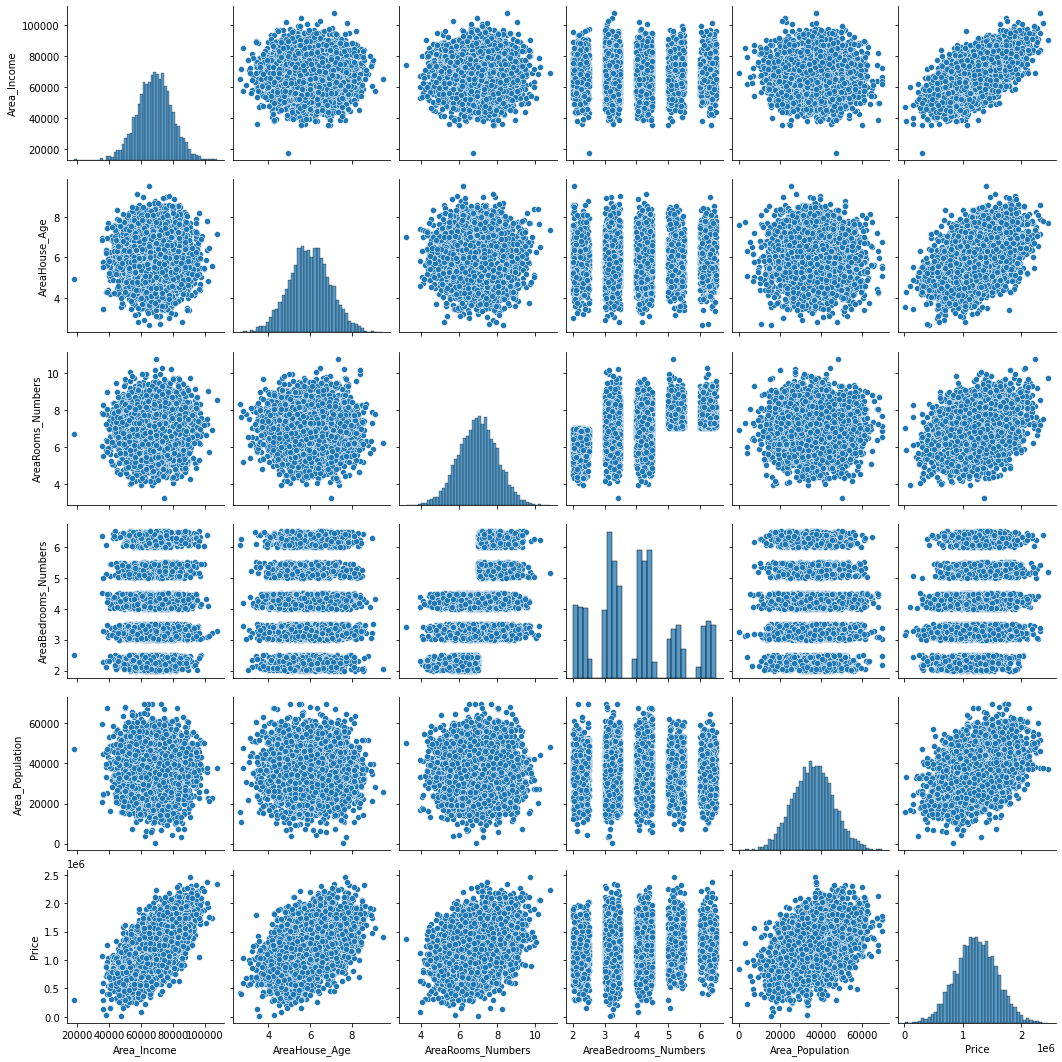

In [ ]:
sns.pairplot(data,kind='scatter')

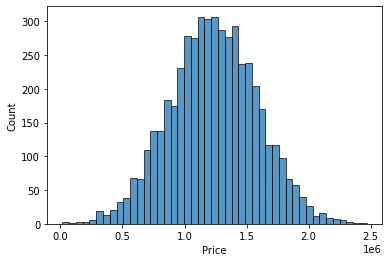

In [ ]:
#Normally Distributed
sns.histplot(data,x='Price')

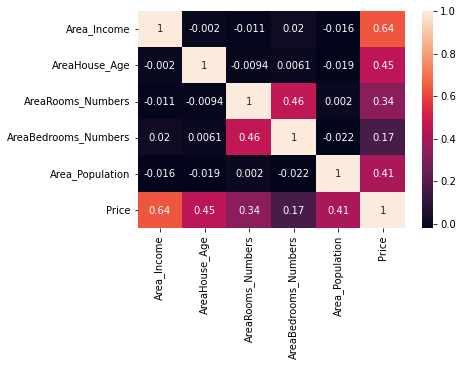

In [ ]:
sns.heatmap(data.corr(), annot=True)

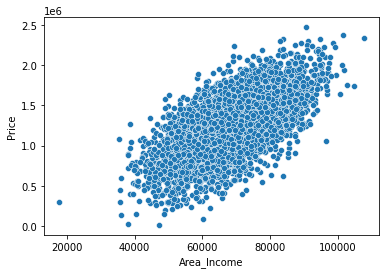

In [ ]:
sns.scatterplot(data=data,x='Area_Income',y='Price')

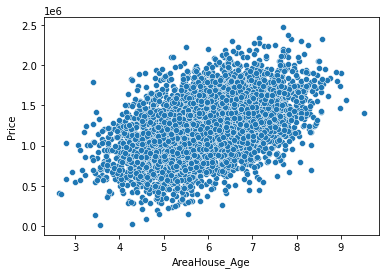

In [ ]:
sns.scatterplot(data=data,x='AreaHouse_Age',y='Price')

# How to Prepare Data for Linear Regression
In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

**Linear Assumption -** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

**Remove Noise -** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible. or use MIN_MAX or Standard Scaler.

**Remove Collinearity -** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

**Gaussian Distributions -** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.

In [ ]:
X = data[['Area_Income', 'AreaHouse_Age', 'AreaRooms_Numbers',
       'AreaBedrooms_Numbers', 'Area_Population']]
y = data['Price']

In [ ]:
#Fit_Transform the Training Data only and Transform the Test Data Only
scaler = MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

## **Cross-Validation: A Quick Recap**
The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LinearRegression()
 
result = cross_val_score(model , X_train_scaled, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9189051602047582


## Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [ ]:
print(len(X_train.columns))

5


In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]

In [ ]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
rfe = RFE(lm)  

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_scaled, y_train)     

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
model_cv.best_params_

{'n_features_to_select': 5}

In [ ]:
# final model
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_scaled, y_train)

# predict prices of X_test
X_test_scaled = scaler.transform(X_test)
y_pred = lm.predict(X_test_scaled)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.9146818498754016


# Model Evaluation with Each Model of Regression


In [ ]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
pred = lin_reg.predict(X_test_scaled)

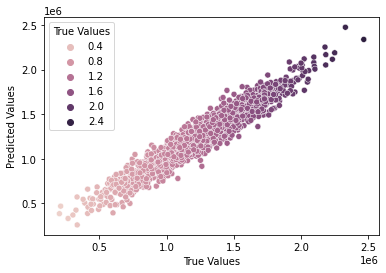

In [ ]:
pred_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})
sns.scatterplot(data=pred_df,x='True Values',y='Predicted Values',hue='True Values')

In [ ]:
pred_df['Error'] = y_test - pred

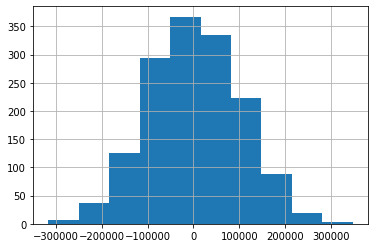

In [ ]:
pred_df['Error'].hist()
#Most of the Erros are 0 so we have Good Normal Distribution Here and Model Fits Good

#Here are three common evaluation metrics for regression problems:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$

Mean Squared Error (MSE) is the mean of the squared errors:
 
$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$
 
 
📌 Comparing these metrics:

1. MAE is the easiest to understand, because it's the average error.
2. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
3. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [ ]:
test_pred = lin_reg.predict(X_test_scaled)
train_pred = lin_reg.predict(X_train_scaled)

print('\n-----------Test set evaluation-----------')
print_evaluate(y_test, test_pred)
print('\n-----------Train set evaluation-----------')
print_evaluate(y_train, train_pred)


-----------Test set evaluation-----------
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016

-----------Train set evaluation-----------
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526


In [56]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.91238,0.917379


**Main limitation of Linear Regression** is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. It assumes that there is a straight-line relationship between the dependent and independent variables which is incorrect many times.

# **Robust Regression**
One instance in which robust estimation should be considered is when there is a strong suspicion of **heteroscedasticity**.

## **Random Sample Consensus - RANSAC**
Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

**Limitations -** The only disadvantage of robust regression is that, under fully Gaussian residuals, it is less powerful than OLS regression

In [57]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [58]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901


# **Ridge Regression**
In Ridge regression, we add a penalty term which is equal to the square of the coefficient. Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2
$

α>=0  is a complexity parameter that controls the amount of shrinkage: the larger the value of α, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

**Ridge regression is an L2 penalized model**. Add the squared sum of the weights to the least-squares cost function.

**Limitation of Ridge Regression:** Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

In [59]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [60]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


# **LASSO Regression**

It adds penalty term to the cost function. This term is the absolute sum of the coefficients.
A linear model that estimates sparse coefficients.
Mathematically, it consists of a linear model trained with  ℓ1  prior as regularizer. The objective function to minimize is:

$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$

**Limitations -** 

1. Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).

2. If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data


In [61]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#             warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [62]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


# **Elastic Net**

Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543418448/eq12_vh6ilt.png">

**Limitation** - Computing Cost is too much

In [63]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [64]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


# **Polynomial Regression**

Polynomial Regression is another type of Linear Regression that include Linear Terms like 𝑏₁𝑥₁ along with non-linear terms  like 𝑏₂𝑥₁², 𝑏₃𝑥₁³, or even 𝑏₄𝑥₁𝑥₂, 𝑏₅𝑥₁²𝑥₂, and so on in your Regression function 𝑓.

For Example - Degree 2 Estimated Polynomial Regression Function - 

    𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥².

Same here, we need to calculate the 𝑏₀, 𝑏₁, and 𝑏₂, which minimize the OLS.

Let's Compare the Previous Degree-1 Regression Function with the linear regression Function.

    𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ 
    𝑓(𝑥₁) = 𝑏₀ + 𝑏₁𝑥₁

So, They are quite similar with only some values need to be find out those 𝑏₀, 𝑏₁, and 𝑏₂. So, Solution is to solve the Polynomial Regression Problem just like the Linear Regression Problem usng 𝑥² as input variable.

**Limitations -** 

1. The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
2. These are too sensitive to the outliers.
3. In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train_scaled)
X_test_2_d = poly_reg.transform(X_test_scaled)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

In [66]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


# **Stochastic Gradient Descent**

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

It is easier to fit into memory due to a single training sample being processed by the network

It is computationally fast as only one sample is processed at a time.

For larger datasets it can converge faster as it causes updates to the parameters more frequently

**Disadvantages of Stochastic Gradient Descent**
1. Due to frequent updates the steps taken towards the minima are very noisy. This can often lead the gradient descent into other directions.
2. Also, due to noisy steps it may take longer to achieve convergence to the minima of the loss function
3. Frequent updates are computationally expensive due to using all resources for processing one training sample at a time
4. It loses the advantage of vectorized operations as it deals with only a single example at a time

In [67]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train_scaled, y_train)

test_pred = sgd_reg.predict(X_test_scaled)
train_pred = sgd_reg.predict(X_train_scaled)

In [68]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566984,1.006842e+10,100341.531936,0.914682,0.000000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train_scaled)
X_test = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1635975954432.0000 - val_loss: 1658169327616.0000
Epoch 2/100
3500/3500 [==============================] - 6s 2ms/step - loss: 1635527950336.0000 - val_loss: 1657010257920.0000
Epoch 3/100
3500/3500 [==============================] - 6s 2ms/step - loss: 1632737820672.0000 - val_loss: 1651683229696.0000
Epoch 4/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1623352410112.0000 - val_loss: 1636311367680.0000
Epoch 5/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1599885148160.0000 - val_loss: 1601315799040.0000
Epoch 6/100
3500/3500 [==============================] - 6s 2ms/step - loss: 1551130951680.0000 - val_loss: 1532917972992.0000
Epoch 7/100
3500/3500 [==============================] - 6s 2ms/step - loss: 1462950690816.0000 - val_loss: 1415670398976.0000
Epoch 8/100
3500/3500 [==============================] - 6s 2ms/step - loss: 1319505100800.0000 - val_loss: 123

In [69]:
test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [71]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566984,1.006842e+10,100341.531936,0.914682,0.000000
7,Artficial Neural Network,81184.431473,1.007805e+10,100389.492321,0.914600,0.000000


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train_scaled, y_train)

test_pred = rf_reg.predict(X_test_scaled)
train_pred = rf_reg.predict(X_train_scaled)


In [73]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566984,1.006842e+10,100341.531936,0.914682,0.000000
7,Artficial Neural Network,81184.431473,1.007805e+10,100389.492321,0.914600,0.000000
8,Random Forest Regressor,94209.904163,1.413253e+10,118880.312648,0.880243,0.000000


In [74]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train_scaled, y_train)

test_pred = svm_reg.predict(X_test_scaled)
train_pred = svm_reg.predict(X_train_scaled)


In [75]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,82138.574678,1.034007e+10,101686.150831,0.912380,0.917379
1,Robust Regression,84782.222732,1.125059e+10,106068.798995,0.904664,0.912901
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.566984,1.006842e+10,100341.531936,0.914682,0.000000
7,Artficial Neural Network,81184.431473,1.007805e+10,100389.492321,0.914600,0.000000
8,Random Forest Regressor,94209.904163,1.413253e+10,118880.312648,0.880243,0.000000
9,SVM Regressor,87205.730515,1.172093e+10,108263.256764,0.900679,0.000000


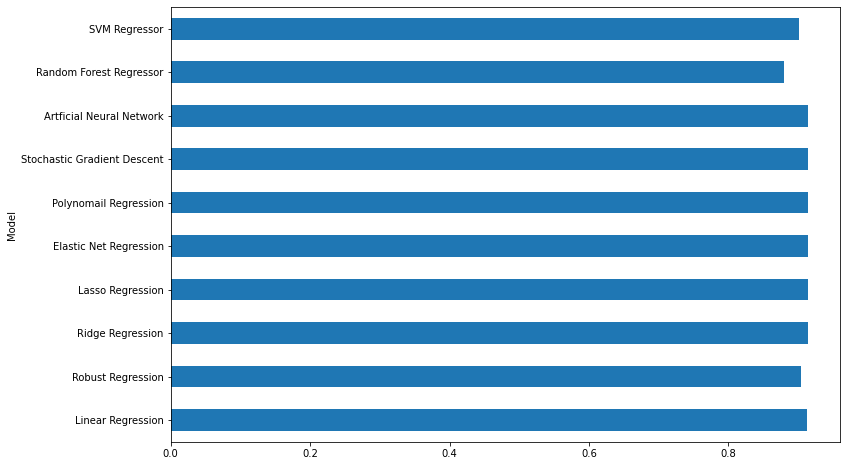

In [76]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))